#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Importing libraries from Sci-kit Learn

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(8, 6)})
warnings.filterwarnings("ignore")

#### Importing the DataSet

In [3]:
df = pd.read_csv('titanic_data.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Types of Features:
    Categorical - Sex and Enbarked
    Continuous - Age, Fare
    Discrete - SbSp, Parch.
    Alphnumeric - Cabin

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Numerical Value Analysis

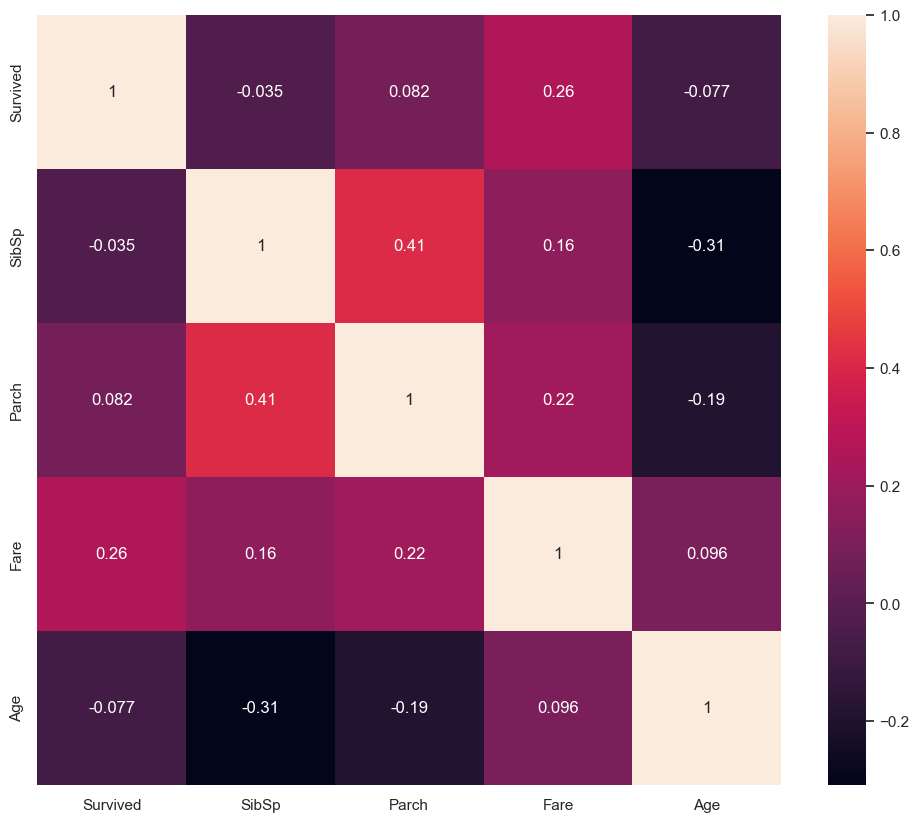

In [6]:
plt.figure(figsize = (12, 10))
heapmap = sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

#### <font color = 'green'>SibSp - Number of sibling/spouses aboard the Titanic</font>

In [7]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

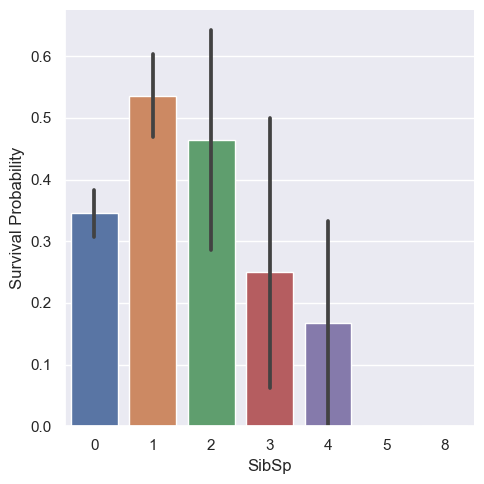

In [8]:
sns.catplot(x='SibSp', y = 'Survived', data = df, kind = 'bar').set_ylabels("Survival Probability")

#### <font color = 'green'> Age</font>

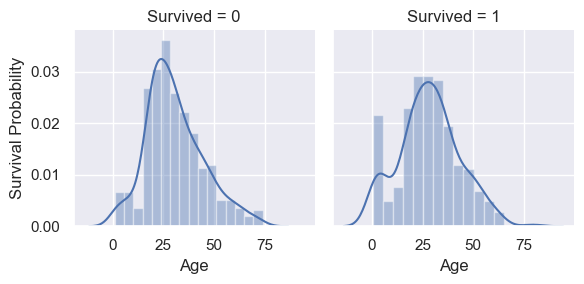

In [9]:
age_visual = sns.FacetGrid(df, col = 'Survived')
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels("Survival Probability")

#### <font color = 'green'> Sex</font>

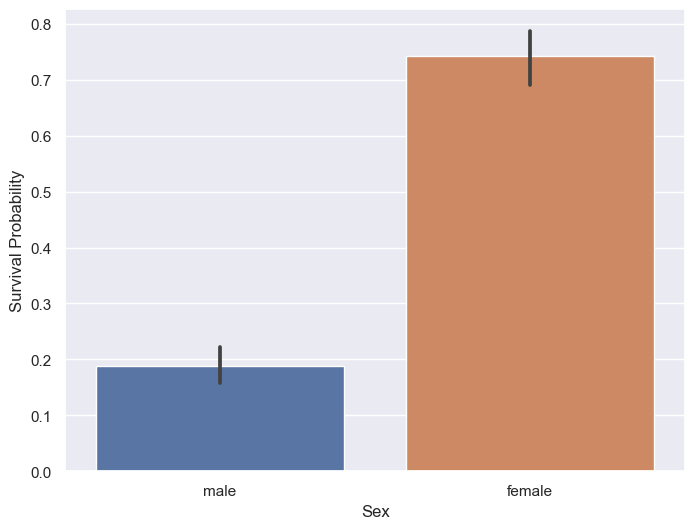

In [10]:
age_plot = sns.barplot(x = 'Sex', y = "Survived", data = df).set_ylabel("Survival Probability")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### <font color = 'green'>PClass</font>

Text(0, 0.5, 'Survival Probability')

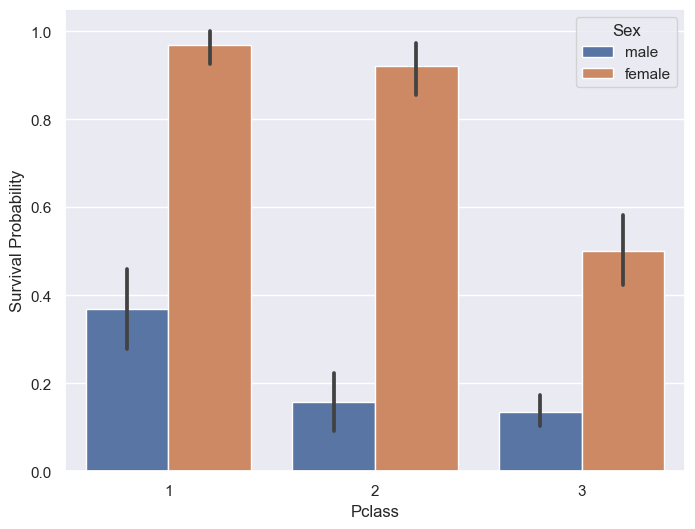

In [13]:
sns.barplot(x='Pclass', y = 'Survived', data = df, hue='Sex').set_ylabel("Survival Probability")

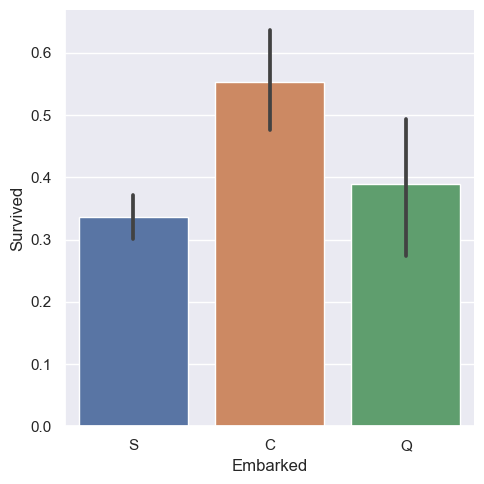

In [14]:
sns.catplot(x='Embarked', y = 'Survived', data = df, kind = 'bar')

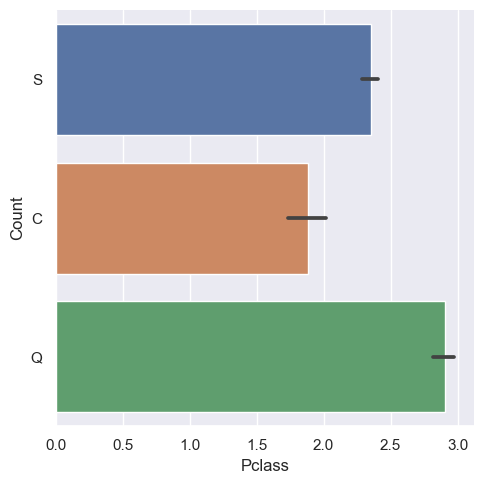

In [15]:
g= sns.catplot(x='Pclass', y = 'Embarked', data = df, kind = 'bar')
g = g.despine(left = True)
g = g.set_ylabels("Count")

#### Preparing the Data

In [16]:
 data = pd.read_csv('titanic_data.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
null_ages = data['Age'].isnull()

In [20]:
mean = data['Age'].mean()
std = data['Age'].std()
rand_age = np.random.randint(mean-std, std+mean, size=177)

In [21]:
data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [22]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [23]:
data['Age'].isnull().sum()

0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data['Embarked'] = data['Embarked'].fillna('S')

In [26]:
data['Embarked'].isnull().sum()

0

In [27]:
drop_col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(drop_col, axis = 1, inplace = True)

In [28]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
gender = {'male':1, 'female':0}
data['Sex'] = data['Sex'].map(gender)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [31]:
embark = {'S': 0, 'C':1, 'Q':2}
data['Embarked'] = data['Embarked'].map(embark)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


#### Splitting Data

In [33]:
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [34]:
from sklearn.model_selection import train_test_split
xtest, xtrain, ytest, ytrain = train_test_split(x, y, test_size = 0.30, random_state = 0)

#### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

#### Classification of Algorithms

In [36]:
logistic = LogisticRegression()
svc_classifier = SVC()
rf = RandomForestClassifier(n_estimators = 1000)
DT = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)

#### Training the Data

In [38]:
logistic.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
DT.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

#### Predicting the output with input

In [39]:
logistic_ypred = logistic.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
rf_ypred = rf.predict(xtest)
DT_ypred = DT.predict(xtest)
knn_ypred = knn.predict(xtest)

#### Checking the Accuracy

In [44]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(ytest, logistic_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
rf_acc = accuracy_score(ytest, rf_ypred)
DT_acc = accuracy_score(ytest, DT_ypred)
knn_acc = accuracy_score(ytest, knn_ypred)

#### Printing the Accuracy

In [47]:
print("logistic_acc :", round(logistic_acc*100, 2))
print("svc_classifier_acc :",round(svc_classifier_acc*100, 2))
print("rf_acc : ",round(rf_acc*100, 2))
print("DT_acc : ",round(DT_acc*100, 2))
print("knn_acc", round(knn_acc*100, 2))

logistic_acc : 79.29
svc_classifier_acc : 81.54
rf_acc :  78.01
DT_acc :  75.6
knn_acc 77.85
